# Hypothesis Testing with YouTube Data
This notebook compares the percent of likes for YouTube videos by channel (late night talk shows) and video category (category_id 17 and 22) using various hypothesis tests, including ANOVA, Tukey's HSD, t-test with bootstrap, and permutation test.

Link to dataset:
* https://www.kaggle.com/datasnaek/youtube-new

In [126]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [128]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [125]:
# Read and preview data
df = pd.read_csv('USvideos.csv')
featured_var = df['views'][0:1000]
print(featured_var);

0        748374
1       2418783
2       3191434
3        343168
4       2095731
         ...   
995    26448434
996       73984
997       67471
998       35125
999      108297
Name: views, Length: 1000, dtype: int64


### Pre-processing

In [129]:
# def bootstrap(data, Nboot, x):
#     data =  np.array(data)
    
#     resampled_stat = []
#     confidence_point = []
#     for k in range(Nboot):
#         #lay mau co hoan lai
#         index = np.random.randint(0, len(data), len(data))
#         sample = data[index]
#         bstatistic = np.mean(sample)
#         resampled_stat.append(bstatistic)
    
#     cut = int((100-x)/2)
#     first_point = resampled_stat[cut]
#     end_point = resampled_stat[len(resampled_stat) - cut]
#     confidence_point.append([first_point, end_point])
#     return [resampled_stat,confidence_point]


def bootstrap(data, n, Nboot, x):
    data =  np.array(data)
    
    resampled_stat = []
    confidence_point = []
    for k in range(Nboot):
        #lay mau co hoan lai
        # pick_index = np.random.randint(len(data)-n)
        # new_data = data[pick_index: pick_index + 500]
        index = np.random.randint(0, 1000, n)
        sample = data[index]
        bstatistic = np.mean(sample)
        resampled_stat.append(bstatistic)
        
    resampled_stat.sort()
    cut = int((100-x)/2)
    first_point = resampled_stat[cut]
    end_point = resampled_stat[len(resampled_stat) - cut]
    confidence_point.append([first_point, end_point])
    return [resampled_stat,confidence_point]

In [130]:
Nboot = 500
[featured_var_bootsrap, confidence_point] = bootstrap(featured_var, 500, Nboot, 90)
#plt.hist(featured_var)

In [143]:
print("featured_var_bootsrap mean: " + str(np.mean(featured_var_bootsrap)))
print("featured_var mean: " + str(np.mean(featured_var)))
print("std: " + str(np.std(featured_var_bootsrap)))

featured_var_bootsrap mean: 1011713.483404
featured_var mean: 1015634.439
std: 127568.58420224088


In [144]:
print("confidence_point: " + str(confidence_point))

confidence_point: [[737987.974, 1311069.984]]


Text(1311069.984, 26, '1311070')

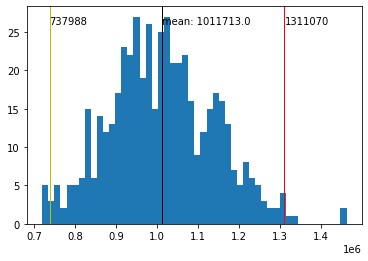

In [147]:
plt.hist(featured_var_bootsrap,  bins=50)
plt.axvline(confidence_point[0][0], color='y', linestyle='-', linewidth=1)
plt.axvline(confidence_point[0][1], color='r', linestyle='-', linewidth=1)
plt.axvline(np.mean(featured_var_bootsrap), color='k', linestyle='-', linewidth=1)
plt.text(np.mean(featured_var_bootsrap), 26, "mean: " + str(np.mean(round(np.mean(featured_var_bootsrap)))))
plt.text(confidence_point[0][0], 26, str(round(confidence_point[0][0])))
plt.text(confidence_point[0][1], 26, str(round(confidence_point[0][1])))